# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


Se define la función

In [1]:
function derivada_derecha(f::Function, x, h::Float64)
        
        d = ( f(x + h) - f(x) ) / h    
        return d
        
end
#Fin de derivada derecha

derivada_derecha (generic function with 1 method)

Se hace una tabla con el valor obtenido de la función y el error. Usé h de la forma $1/10^i$.

In [34]:
ea = Array{Float64}(10)

println("Derivada Derecha    |    Error")
println("----------------------------------------------")
for i in 1:10
    
    dd = derivada_derecha(x -> 3(x^3)-2,1,1/(10^i)) #Calcula la derivada
    e = abs(dd - 9)                                 #Calcula el error
    ea[i] = log(10,e)                               #Se toma el logartimo
    println(dd,"   |   ",e)                         #Imprime ambos
    
end
#Fin de for

Derivada Derecha    |    Error
----------------------------------------------
9.930000000000012   |   0.9300000000000122
9.09030000000004   |   0.09030000000004001
9.009002999999183   |   0.009002999999182748
9.000900029993986   |   0.0009000299939856404
9.000090000332861   |   9.000033286099551e-5
9.000008999393572   |   8.999393571684777e-6
9.000000904535455   |   9.045354545378359e-7
9.000000034120603   |   3.4120603231713176e-8
9.000000744663339   |   7.446633389918134e-7
9.000000744663339   |   7.446633389918134e-7


Se hace la gráfica usando una escala logarítmica de base 10.

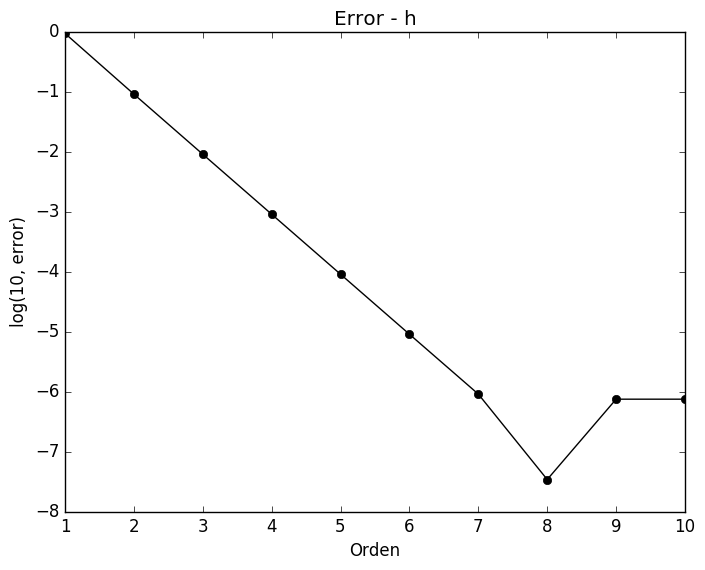

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f593395d5c0>

In [35]:
#Gráfica
using PyPlot

title("Error - h")
xlabel("Orden")
ylabel("log(10, error)")
plot(1:10, ea, "ko-")

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [4]:
function d_simetrica(f::Function, x, h::Float64)
        
    d = ( f(x + h) - f(x - h) ) / (2 * h)    
    return d
        
end
#Fin de d_simetrica

d_simetrica (generic function with 1 method)

In [36]:
eb = Array{Float64}(10)

println("Derivada Derecha    |    Error")
println("----------------------------------------------")
for i in 1:10
    
    dd = d_simetrica(x -> 3(x^3)-2,1,1/(10^i)) #Calcula la derivada
    e = abs(dd - 9)                                 #Calcula el error
    eb[i] = log(10,e)
    println(dd,"   |   ",e)                         #Imprime ambos
    
end
#Fin de for

Derivada Derecha    |    Error
----------------------------------------------
9.030000000000005   |   0.03000000000000469
9.000300000000005   |   0.0003000000000046299
9.000002999999701   |   2.9999997011032065e-6
9.000000029997235   |   2.9997234918255344e-8
9.00000000030321   |   3.0320990163090755e-10
8.99999999970369   |   2.96310531666677e-10
9.000000000813912   |   8.139124929584796e-10
8.999999989711682   |   1.0288317753293086e-8
9.00000030057413   |   3.0057412914175075e-7
9.000000744663339   |   7.446633389918134e-7


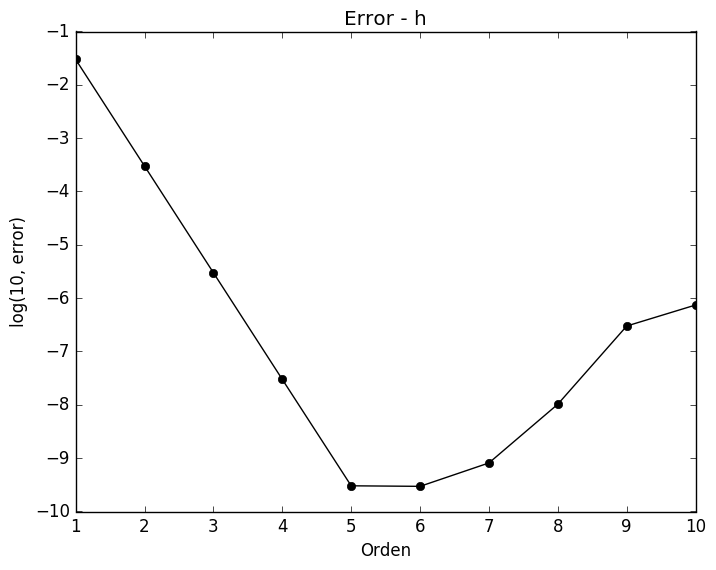

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f593390aa20>

In [38]:
#Gráfica

title("Error - h")
xlabel("Orden")
ylabel("log(10, error)")
plot(1:10, eb, "ko-")

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [17]:
function d_compleja(f::Function, x, h::Float64)
        
    d = imag( f(x + im*h) / h)
    return d
        
end
#Fin de d_compleja

d_compleja (generic function with 1 method)

In [40]:
ec = Array{Float64}(10)

println("Derivada Derecha    |    Error")
println("----------------------------------------------")
for i in 1:10
    
    dd = d_compleja(x -> 3(x^3)-2,1,1/(10^i)) #Calcula la derivada
    e = abs(dd - 9)                                 #Calcula el error
    ec[i] = log(10,e)
    println(dd,"   |   ",e)                         #Imprime ambos
    
end
#Fin de for

Derivada Derecha    |    Error
----------------------------------------------
8.97   |   0.02999999999999936
8.9997   |   0.0002999999999993008
8.999996999999999   |   3.0000000013075123e-6
8.999999970000001   |   2.999999892949745e-8
8.9999999997   |   3.000000248221113e-10
8.999999999997   |   3.000266701747023e-12
8.99999999999997   |   3.019806626980426e-14
8.999999999999998   |   1.7763568394002505e-15
9.0   |   0.0
9.0   |   0.0


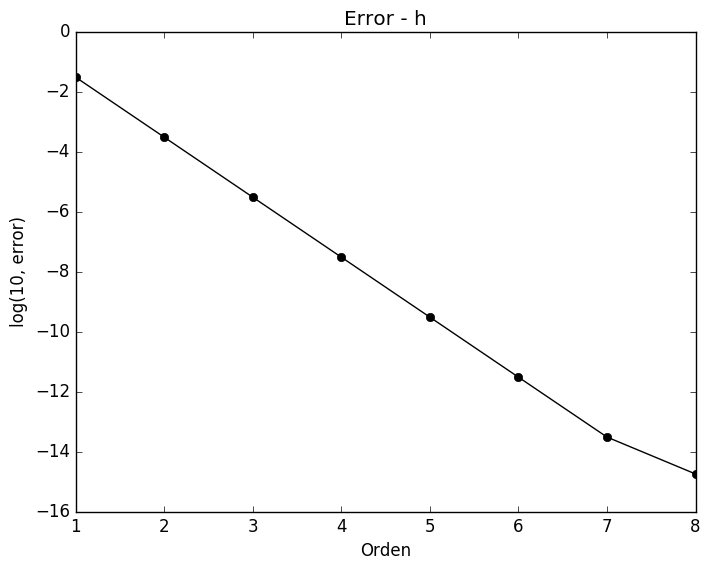

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5933778e48>

In [41]:
# Gráfica

title("Error - h")
xlabel("Orden")
ylabel("log(10, error)")
plot(1:10, ec, "ko-")

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

Revisando las definciones se obtiene

**Por la derecha**

\begin{equation}
\frac{3(x_0+h)^3-2-(3x_0^3-2)}{h} = 3(x_0^2+3hx_0+h^2)
\end{equation}

**Simétrica**

\begin{equation}
\frac{3(x_0+h)^3-2-3((x_0-h)^3-2)}{2h}=3(3x_0^2+h^2)
\end{equation}

**Compleja**

\begin{equation}
\Im\left(\frac{3(x_0+ih)^3-2}{h}\right) 
= 3\Im\left(\frac{x_0^3}{h}-3x_0h + i(3x_0^2-h^2)\right)
=3(3x_0^2-h^2)
\end{equation}

Y vemos que el error con respecto a la solución analítica es menor en la versión compleja. Por lo cual es la más exacta.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Porque para obtener una resultado exacto tendríamos que dividir entre cero. Esto se debe a que siempre debemos dividir entre h la función puesto a que desconocemos la función que debemos derivar. Para evitar el problema tendríamos que hacer un programa de tipo simbólico que pudiera hacer el álgebra y después evaluar cuando h = 0.